# Bitcoin price forecasting with PySpark
## Big Data Computing final project - A.Y. 2022 - 2023
Prof. Gabriele Tolomei

MSc in Computer Science

La Sapienza, University of Rome

### Author
Corsi Danilo - corsi.1742375@studenti.uniroma1.it



Description: In this notebook I am going to explore the data and visualize the correlations check their stationarity and choose features to use to train the models.

# Dependencies, Libraries and Tools

In [ ]:
JAVA_HOME = "/usr/lib/jvm/java-8-openjdk-amd64"
SLOW_OPERATION = False

In [ ]:
#Install some useful dependencies
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from itertools import cycle

import plotly.express as px

import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot
import gc

import pandas as pd
import numpy as np
import json

import matplotlib.pyplot as plt
import seaborn as sns

# !pip install -U -q PyDrive # To use files that are stored in Google Drive directly (e.g., without downloading them from an external URL)
# !apt install openjdk-8-jdk-headless -qq
# import os
# os.environ["JAVA_HOME"] = JAVA_HOME

# Link to Google Drive

In [ ]:
GDRIVE_DIR = "/content/drive"

GDRIVE_DATASET_RAW_DIR = GDRIVE_DIR + "/MyDrive/BDC/project/datasets/raw"
GDRIVE_DATASET_TEMP_DIR = GDRIVE_DIR + "/MyDrive/BDC/project/datasets/temp"
GDRIVE_DATASET_OUTPUT_DIR = GDRIVE_DIR + "/MyDrive/BDC/project/datasets/output"

GDRIVE_DATASET_NAME = "bitcoin_blockchain_data_1h"

GDRIVE_DATASET_NAME_EXT = "/" + GDRIVE_DATASET_NAME + ".parquet"

GDRIVE_DATASET = GDRIVE_DATASET_RAW_DIR + GDRIVE_DATASET_NAME_EXT

SLOW_OPERATION: False

In [ ]:
# Point Colaboratory to our Google Drive
from google.colab import drive

drive.mount(GDRIVE_DIR, force_remount=True)

Mounted at /content/drive


# Data visualization ❗

In this section I'm going to explore the dataset
First, we import the dataset from Google Drive, check the shape and print out the schema.

In [ ]:
df = pd.read_parquet(GDRIVE_DATASET)
df

,market-price,market-cap,total-bitcoins,trade-volume,blocks-size,avg-block-size,n-transactions-total,n-transactions-per-block,hash-rate,difficulty,miners-revenue,transaction-fees-usd,n-unique-addresses,n-transactions,estimated-transaction-volume-usd
timestamp,,,,,,,,,,,,,,,
2012-01-01 00:00:00,5.040000,4.032958e+07,8.001900e+06,0.000000e+00,861.941752,0.017073,2.119853e+06,32.686275,8.591401e+00,1.159929e+06,4.260652e+04,1.851638e+01,8531.000000,5001.000000,1.016110e+06
2012-01-01 01:00:00,5.049583,4.040878e+07,8.002377e+06,0.000000e+00,862.050325,0.017158,2.120061e+06,32.817172,8.598608e+00,1.159929e+06,4.345677e+04,1.924442e+01,8547.541667,5018.041667,1.005058e+06
2012-01-01 02:00:00,5.059167,4.048797e+07,8.002854e+06,0.000000e+00,862.158898,0.017244,2.120269e+06,32.948070,8.605816e+00,1.159929e+06,4.430701e+04,1.997246e+01,8564.083333,5035.083333,9.940074e+05
2012-01-01 03:00:00,5.068750,4.056717e+07,8.003331e+06,0.000000e+00,862.267471,0.017329,2.120477e+06,33.078967,8.613023e+00,1.159929e+06,4.515726e+04,2.070050e+01,8580.625000,5052.125000,9.829563e+05
2012-01-01 04:00:00,5.078333,4.064637e+07,8.003808e+06,0.000000e+00,862.376044,0.017414,2.120685e+06,33.209865,8.620231e+00,1.159929e+06,4.600751e+04,2.142854e+01,8597.166667,5069.166667,9.719052e+05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-06-28 20:00:00,30186.176667,5.873250e+11,1.941442e+07,1.677668e+08,491997.874785,1.677334,8.576407e+08,3012.333080,3.530701e+08,5.091447e+13,2.765230e+07,1.090646e+06,709812.500000,420373.833333,4.968820e+09
2023-06-28 21:00:00,30160.530000,5.873250e+11,1.941442e+07,1.668415e+08,492005.423097,1.677159,8.576545e+08,3009.580289,3.566963e+08,5.084740e+13,2.796602e+07,1.099916e+06,713935.625000,424828.625000,5.023238e+09
2023-06-28 22:00:00,30134.883333,5.873250e+11,1.941442e+07,1.659163e+08,492012.971409,1.676985,8.576683e+08,3006.827499,3.603225e+08,5.078034e+13,2.827973e+07,1.109186e+06,718058.750000,429283.416667,5.077657e+09


In [ ]:
df.shape

(100729, 15)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 100729 entries, 2012-01-01 00:00:00 to 2023-06-29 00:00:00
Data columns (total 15 columns):
 #   Column                            Non-Null Count   Dtype  
---  ------                            --------------   -----  
 0   market-price                      100729 non-null  float64
 1   market-cap                        100729 non-null  float64
 2   total-bitcoins                    100729 non-null  float64
 3   trade-volume                      100729 non-null  float64
 4   blocks-size                       100729 non-null  float64
 5   avg-block-size                    100729 non-null  float64
 6   n-transactions-total              100729 non-null  float64
 7   n-transactions-per-block          100729 non-null  float64
 8   hash-rate                         100729 non-null  float64
 9   difficulty                        100729 non-null  float64
 10  miners-revenue                    100729 non-null  float64
 11  transaction-fees-u

In [ ]:
def show_metrics(dataset, feature):
  trace = go.Scatter(
      x = dataset.index,
      y = dataset[feature].astype(float),
      mode = 'lines',
      name = feature
  )

  layout = dict(
      title=feature,
      xaxis=dict(
          rangeselector=dict(
              buttons=list([
                  #change the count to desired amount of months.
                  dict(count=1,
                      label='1m',
                      step='month',
                      stepmode='backward'),
                  dict(count=6,
                      label='6m',
                      step='month',
                      stepmode='backward'),
                  dict(count=12,
                      label='1y',
                      step='month',
                      stepmode='backward'),
                  dict(count=36,
                      label='3y',
                      step='month',
                      stepmode='backward'),
                  dict(step='all')
              ])
          ),
          rangeslider=dict(
              visible = True
          ),
          type='date'
      )
  )

  data = [trace]
  fig = dict(data=data, layout=layout)
  iplot(fig, filename = "Time Series with Rangeslider")

In [ ]:
currency_statistics = ['market-price', 'market-cap', 'total-bitcoins', 'trade-volume']
block_details = ['blocks-size', 'avg-block-size', 'n-transactions-total', 'n-transactions-per-block']
mining_information = ['hash-rate', 'difficulty', 'miners-revenue', 'transaction-fees-usd']
network_activity = ['n-unique-addresses', 'n-transactions', 'estimated-transaction-volume-usd']

In [ ]:
if SLOW_OPERATION:
  for feature in currency_statistics:
    show_metrics(df, feature)

In [ ]:
if SLOW_OPERATION:
  for feature in block_details:
    show_metrics(df, feature)

In [ ]:
if SLOW_OPERATION:
  for feature in mining_information:
    show_metrics(df, feature)

In [ ]:
if SLOW_OPERATION:
  for feature in network_activity:
    show_metrics(df, feature)

# Checking stationarity❗

Source: https://www.kaggle.com/code/debashis74017/time-series-forecasting-itcoin-price?scriptVersionId=113747601&cellId=25

Stationarity means that the statistical properties of a time series i.e. mean, variance and covariance do not change over time. Many statistical models require the series to be stationary to make effective and precise predictions.

Two statistical tests would be used to check the stationarity of a time series:
* Augmented Dickey Fuller (“ADF”) test
* Kwiatkowski-Phillips-Schmidt-Shin (“KPSS”) test.

## ADF Test ❗
ADF test is used to determine the presence of unit root in the series, and hence helps in understand if the series is stationary or not. The null and alternate hypothesis of this test are:

* Null Hypothesis: The series has a unit root.

* Alternate Hypothesis: The series has no unit root.

If the null hypothesis in failed to be rejected, this test may provide evidence that the series is non-stationary.

In [ ]:
from statsmodels.tsa.stattools import adfuller

if SLOW_OPERATION:
  result = adfuller(df['market-price'], autolag='AIC')
  print(f'ADF Statistic: {result[0]}')
  print(f'p-value: {result[1]}')
  for key, value in result[4].items():
      print('Critial Values:')
      print(f'   {key}, {value}')

ADF Stats value is greater than all critical values, and p-value is also greater than 0.05. So we can strongly reject the null hypothesis, and conclude that, Price value is Non-Stationary.

Let's apply log transformation to the data and test again.

In [ ]:
from numpy import log

if SLOW_OPERATION:
  result = adfuller((log(df['market-price'])), autolag='AIC')
  print(f'ADF Statistic: {result[0]}')
  print(f'p-value: {result[1]}')
  for key, value in result[4].items():
      print('Critial Values:')
      print(f'   {key}, {value}')

After applying Log transformation also, ADF Stats value is greater than all critical values, and p-value is also greater than 0.05. It seems, Price value is purely Non-Stationary.

## KPSS test - Kwiatkowski Phillips Schmidt Shin ❗
KPSS is another test for checking the stationarity of a time series. The null and alternate hypothesis for the KPSS test are opposite that of the ADF test:

* Null Hypothesis: The process is trend stationary.

* Alternate Hypothesis: The series has a unit root (series is not stationary).

In [ ]:
from statsmodels.tsa.stattools import kpss

if SLOW_OPERATION:
  result = kpss(df['market-price'], regression='c')
  print('\nKPSS Statistic: %f' % result[0])
  print('p-value: %f' % result[1])
  for key, value in result[3].items():
      print('Critial Values:')
      print(f'   {key}, {value}');

The output of the KPSS test contains 4 values:

* **The KPSS statistic**: is the actual test statistic that is computed while performing the test.
* **p-value**: is the probability score based on which you can decide whether to reject the null hypothesis or not. If the p-value is less than a predefined alpha level (typically 0.05), we reject the null hypothesis.
* **Number of lags used by the test**: is the number of lags of the series that was actually used by the model equation of the kpss test. By default, the statsmodels kpss() uses the ‘legacy’ method. In legacy method, int(12 * (n / 100)**(1 / 4)) number of lags is included, where n is the length of the series.
* **Critical values**: in order to reject the null hypothesis, the test statistic should be greater than the provided critical values. If it is in fact higher than the target critical value, then that should automatically reflect in a low p-value. If the p-value is less than 0.05, the kpss statistic will be greater than the 5% critical value.

Here we find that, KPSS stats value is too high than critical values, so, we concluded that this time series is Non-Stationary

#  [OLD] Feature selection ❗

Source: https://medium.com/experimenting-with-deep-learning/predictbit-d0c1e44990a3


The aim of this section is to remove the features that have less of an impact to the final result from the dataset. This operation is called feature selection.

In [ ]:
# # For quick access
# all_columns = df.columns
# print(all_columns)

# # Continuous
# cont_columns = df.columns[1:]
# print(cont_columns)

# # Dependent Var
# dep_var = 'market-price'

Index(['market-price', 'market-cap', 'total-bitcoins', 'trade-volume',
       'blocks-size', 'avg-block-size', 'n-transactions-total',
       'n-transactions-per-block', 'hash-rate', 'difficulty', 'miners-revenue',
       'transaction-fees-usd', 'n-unique-addresses', 'n-transactions',
       'estimated-transaction-volume-usd'],
      dtype='object')
Index(['market-cap', 'total-bitcoins', 'trade-volume', 'blocks-size',
       'avg-block-size', 'n-transactions-total', 'n-transactions-per-block',
       'hash-rate', 'difficulty', 'miners-revenue', 'transaction-fees-usd',
       'n-unique-addresses', 'n-transactions',
       'estimated-transaction-volume-usd'],
      dtype='object')


Plotting a correlation heatmap for Market Price (our target) against all the continuous features yields the following:

In [ ]:
# cor = df.corr().abs()

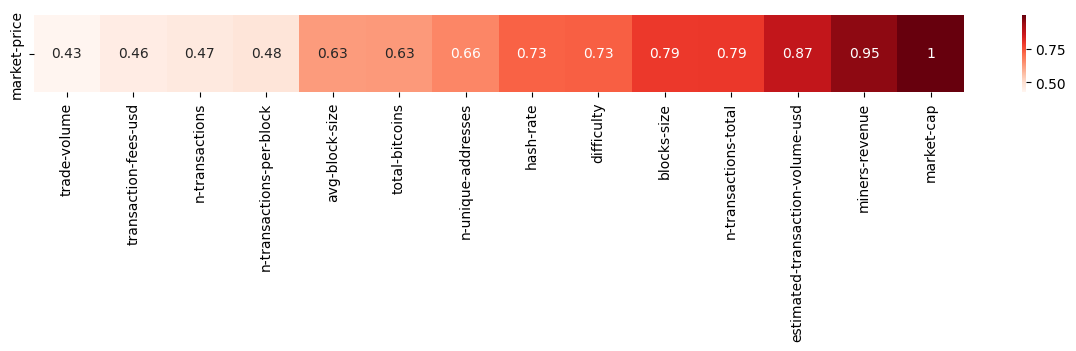

In [ ]:
# # Correlation b/w Market Price and Continuous Features:
# cont_df = df[cont_columns]
# cont_df[dep_var] = df[dep_var]
# cont_corr_df = cont_df.corr()
# plt.figure(figsize=(15,1))
# sns.heatmap(cont_corr_df.sort_values(by=dep_var, axis=1).drop(dep_var, axis=1).tail(1), annot=True, cmap=plt.cm.Reds)
# plt.show()

Before we eliminate any columns, lets first filter out and keep features that satisfy this first condition: (1) highly correlated to our target.

We can then visualize this filtered subset with a Seaborn heat map to inductively identify which features are also correlated to each other.

To get this to work, first, we’ll collect all correlation comparisons to our target in a variable called “cor_target”.

In [ ]:
# cor_target = cor[dep_var]

<ipython-input-45-0bf763bd7335>:10: DeprecationWarning:

`np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations



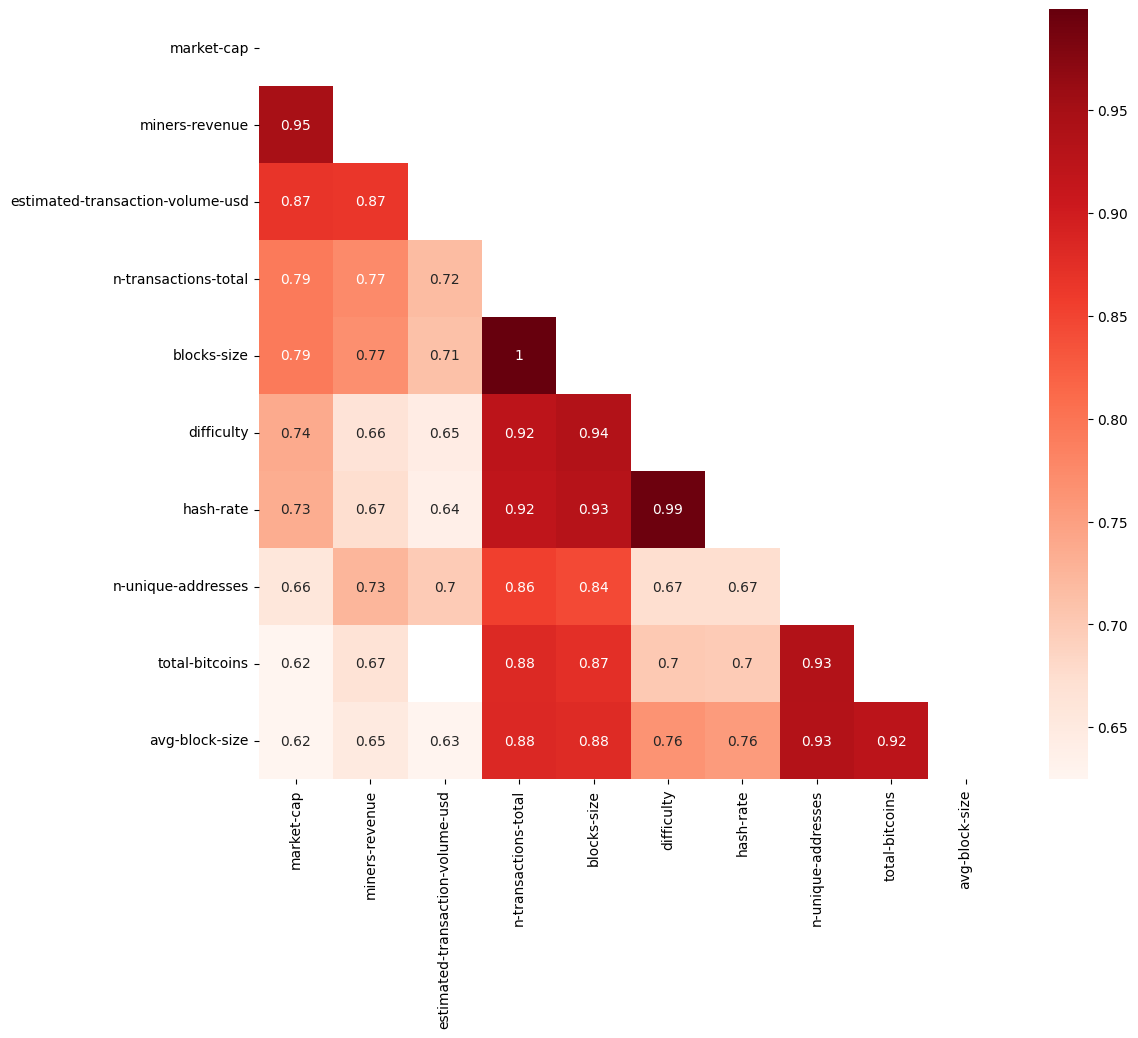

(['market-cap',
  'miners-revenue',
  'estimated-transaction-volume-usd',
  'n-transactions-total',
  'blocks-size',
  'difficulty',
  'hash-rate',
  'n-unique-addresses',
  'total-bitcoins',
  'avg-block-size'],
 None)

In [ ]:
# # Identifying Features Highly Correlated with Target and Other Features:
# relevant_features = cor_target[cor_target>0.6]

# rel_df = relevant_features.to_frame() #.transpose()
# rel_df = rel_df.sort_values(dep_var, ascending=False)
# rel_columns = rel_df[1:].index.values.tolist()
# rel_corr_df = df[rel_columns].corr()

# plt.figure(figsize=(12,10))
# mask = np.zeros_like(rel_corr_df, dtype=np.bool)
# mask[np.triu_indices_from(mask)] = True
# sns.heatmap(rel_corr_df[rel_corr_df > .6], annot=True, cmap=plt.cm.Reds, mask=mask)
# rel_columns, plt.show()

The above heat map illustration demonstrates that several of these filtered features are also correlated to each other.

In this scenario, we want to minimize the number of red cells by, again, filtering by a certain threshold.

I used a higher threshold, here, to prevent dropping too many features.

<ipython-input-46-fc3f7204a048>:3: DeprecationWarning:

`np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations

<ipython-input-46-fc3f7204a048>:14: DeprecationWarning:

`np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations



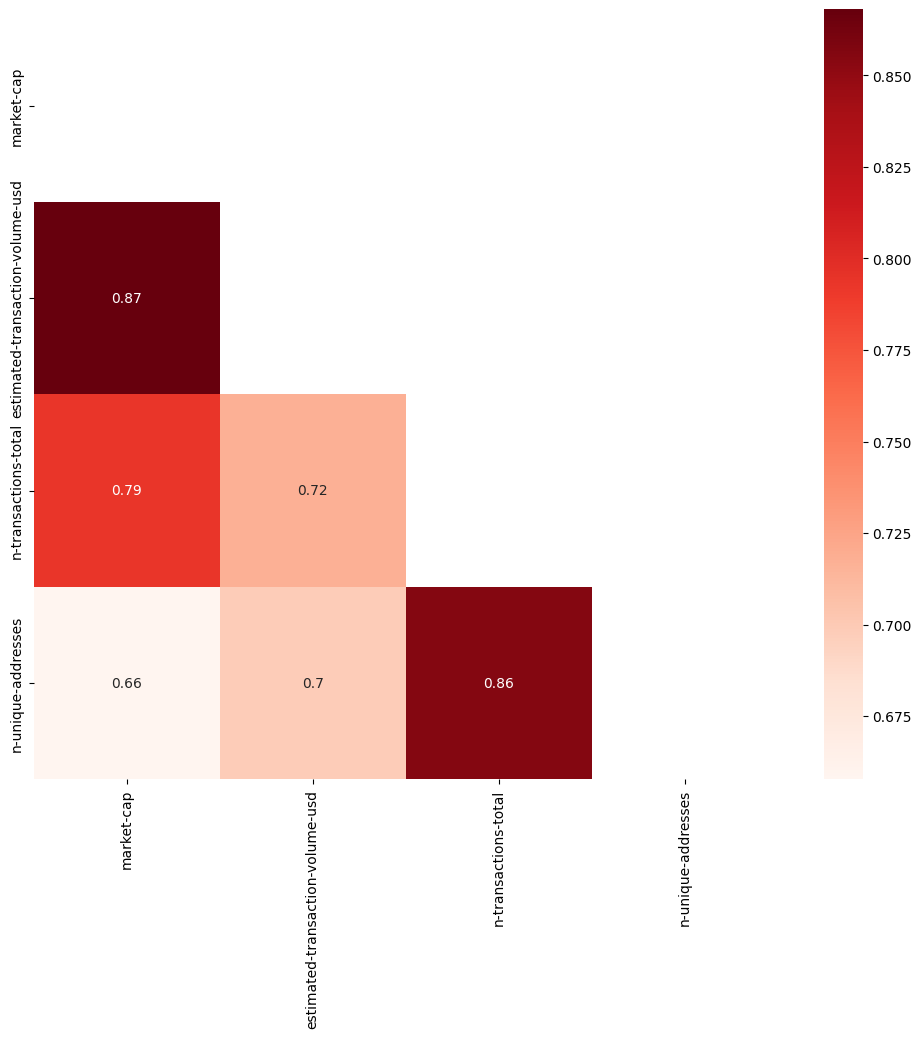

(['market-cap',
  'estimated-transaction-volume-usd',
  'n-transactions-total',
  'n-unique-addresses'],
 None)

In [ ]:
# # Reducing Dimensionality of Correlation Matrix:
# def dimentionalize_corr_matrix(cor_df, upper_bound=0.95):
#   upper = cor_df.where(np.triu(np.ones(cor_df.shape), k=1).astype(np.bool))
#   to_drop = [column for column in upper.columns if any(upper[column] > upper_bound)]
#   rel_df_clean = cor_df.drop(cor_df[to_drop], axis=0)
#   rel_df_clean =  rel_df_clean.drop( rel_df_clean[to_drop], axis=1)
#   return rel_df_clean


# rel_df_clean = dimentionalize_corr_matrix(rel_corr_df, .9)
# rel_columns = rel_df_clean.columns.tolist()

# plt.figure(figsize=(12,10))
# mask = np.zeros_like(rel_df_clean, dtype=np.bool)
# mask[np.triu_indices_from(mask)] = True
# sns.heatmap(rel_df_clean, annot=True, cmap=plt.cm.Reds, mask=mask)
# rel_columns, plt.show()

The outputted features are: 'market-cap', 'estimated-transaction-volume-usd', 'blocks-size', 'n-unique-addresses'.

We’ll call these columns “relevant columns”.

I decided to use asecond technique for feature elimination from the sklearn library, the RFE method recursively goes through the feature set, removing columns to get the best accuracy level it deems possible.

To use RFE, we first have to declare a sklearn linear regression model (not to be confused with the pyspark Linear Regression model we’ll be using in next steps) and pass that model to the RFE method with the maximum number of features we’d like to extract.

We’re looking for 7 recommended features (the same list length as “relevant columns”) from the RFE model to create a second test group of features. To use the RFE method, we also have to get a list of targets to support RFE’s accuracy check:

In [ ]:
# from sklearn.feature_selection import RFE
# from sklearn.linear_model import LinearRegression as sklearnLR

# model = sklearnLR()
# rfe = RFE(model, step = 7)
# y = df[dep_var].tolist()

We fit the RFE model on the Sklearn Linear Regression model, along with the inputs and targets:

In [ ]:
# X_rfe = rfe.fit_transform(df.drop(dep_var, axis=1), y)
# model.fit(X_rfe, y)
# temp = pd.Series(rfe.support_,index = df.drop(dep_var, axis=1).columns)
# selected_features_rfe = temp[temp==True].index.values.tolist()
# print(selected_features_rfe)

['total-bitcoins', 'blocks-size', 'avg-block-size', 'n-transactions-per-block', 'miners-revenue', 'n-unique-addresses', 'n-transactions']


The outputted features: 'total-bitcoins', 'blocks-size', 'avg-block-size', 'n-transactions-per-block', 'miners-revenue', 'n-unique-addresses', 'n-transactions'.

Vastly different from the list generated earlier! Let’s see how it goes.

#  Feature selection ❗

In [ ]:
# For quick access
all_columns = df.columns
print(all_columns)

# Continuous
cont_columns = df.columns[1:]
print(cont_columns)

# Dependent Var
dep_var = 'market-price'

Index(['market-price', 'market-cap', 'total-bitcoins', 'trade-volume',
       'blocks-size', 'avg-block-size', 'n-transactions-total',
       'n-transactions-per-block', 'hash-rate', 'difficulty', 'miners-revenue',
       'transaction-fees-usd', 'n-unique-addresses', 'n-transactions',
       'estimated-transaction-volume-usd'],
      dtype='object')
Index(['market-cap', 'total-bitcoins', 'trade-volume', 'blocks-size',
       'avg-block-size', 'n-transactions-total', 'n-transactions-per-block',
       'hash-rate', 'difficulty', 'miners-revenue', 'transaction-fees-usd',
       'n-unique-addresses', 'n-transactions',
       'estimated-transaction-volume-usd'],
      dtype='object')


In [ ]:
# Compute the correlation matrix
matrix_pearson = df.corr(method='pearson')
matrix_spearman = df.corr(method='spearman')

# Sorting values
pearson_correlations = matrix_pearson[dep_var].sort_values(ascending=False)
pearson_correlations = pearson_correlations[pearson_correlations.index != dep_var]
spearman_correlations = matrix_spearman[dep_var].sort_values(ascending=False)
spearman_correlations = spearman_correlations[spearman_correlations.index != dep_var]

# Compute the mean between the two correlation matrix
features = {}
for key in pearson_correlations.keys():
    features[key] = [pearson_correlations[key], spearman_correlations[key]]

mean_features = {}
for key in features.keys():
    mean_features[key] = sum(features[key]) / len(features[key])

cor_matrix_features =  dict(list(mean_features.items())[:7])
print(cor_matrix_features)

{'market-cap': 0.9993580748187127, 'miners-revenue': 0.9659014332188722, 'estimated-transaction-volume-usd': 0.9187840452713969, 'n-transactions-total': 0.8691914899234219, 'blocks-size': 0.8685364248613952, 'difficulty': 0.8368695592756238, 'hash-rate': 0.8353207657829549}


In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

# Separate features and target variable
X = df.drop(columns=[dep_var])
y = df[dep_var]

# Train the model with the optimal parameters
gb = GradientBoostingRegressor(n_estimators=100, max_depth=5, learning_rate=0.05)

# Train the model on the features and the target variable
gb.fit(X, y)

# Get the most important features
importances = gb.feature_importances_
sorted_indices = importances.argsort()[::-1]

features = {}
for i in sorted_indices:
    features[X.columns[i]] = importances[i]

gb_features =  dict(list(features.items())[:7])
print(gb_features)

{'market-cap': 0.9987202050404042, 'n-transactions-total': 0.0003438611818026194, 'difficulty': 0.000303497705367867, 'miners-revenue': 0.00020069419351171751, 'total-bitcoins': 0.00016681966545818174, 'blocks-size': 0.00010244096283146869, 'transaction-fees-usd': 5.799009011053424e-05}


# Output

In the latter section I'm going to save the features I extrapolated previously.

In [ ]:
GDRIVE_FEATURES_DIR = GDRIVE_DIR + "/MyDrive/BDC/project/datasets/features"

GDRIVE_COR_MATRIX_FEATURES_NAME = "cor_matrix_features"
GDRIVE_GB_FEATURES_NAME = "gb_features"

GDRIVE_COR_MATRIX_FEATURES_NAME_EXT = "/" + GDRIVE_COR_MATRIX_FEATURES_NAME + ".json"
GDRIVE_GB_FEATURES_NAME_EXT = "/" + GDRIVE_GB_FEATURES_NAME + ".json"

GDRIVE_COR_MATRIX_FEATURES = GDRIVE_FEATURES_DIR + GDRIVE_COR_MATRIX_FEATURES_NAME_EXT
GDRIVE_GB_FEATURES = GDRIVE_FEATURES_DIR + GDRIVE_GB_FEATURES_NAME_EXT

In [ ]:
with open(GDRIVE_COR_MATRIX_FEATURES, 'w') as file:
    json.dump(cor_matrix_features, file)

In [ ]:
with open(GDRIVE_GB_FEATURES, 'w') as file:
    json.dump(gb_features, file)